## 2.4 Обучение, переобучение, недообучение и кросвалидация
Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных

In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important; height:50% !important;}</style>"

In [32]:
# load train and test data
iris_train = pd.read_csv('train_iris.csv', index_col=0) #set first column as index 
iris_test = pd.read_csv('test_iris.csv', index_col=0)

In [33]:
# check the correct importing
print(iris_train.head())
print(iris_test.head())

     sepal length  sepal width  petal length  petal width  species
130           7.4          2.8           6.1          1.9        2
7             5.0          3.4           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
142           5.8          2.7           5.1          1.9        2
109           7.2          3.6           6.1          2.5        2
     sepal length  sepal width  petal length  petal width  species
114           5.8          2.8           5.1          2.4        2
70            5.9          3.2           4.8          1.8        1
138           6.0          3.0           4.8          1.8        2
59            5.2          2.7           3.9          1.4        1
44            5.1          3.8           1.9          0.4        0


In [34]:
# split data to train and test data 
X_train = iris_train.drop('species', axis=1)
y_train = iris_train.species

X_test = iris_test.drop('species', axis=1)
y_test = iris_test.species

In [35]:
# set the random seed to 0 
np.random.seed(0)

# create iterarot and empty data frame
max_depth_values = range(1,100)
score_data = pd.DataFrame()

In [36]:
# loop through the max depth and save train and test score to data frame 
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score], 
                                    'test_score':[test_score]})
    
    score_data = score_data.append(temp_score_data)

score_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [37]:
# Preprocess data for viz
score_data_long = pd.melt(score_data, id_vars=['max_depth'],
                         value_vars=['train_score', 'test_score'],
                         var_name='set_type', value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


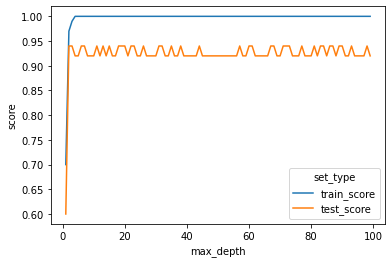

In [38]:
# Visualize the score data via seaborn
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)